In [1]:
!pip install prophet
!pip install --upgrade prophet

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [3]:
import plotly as py

In [4]:
df = pd.read_csv('Electric_Consumption_And_Cost.csv',low_memory=False)

In [5]:
df.shape

(447849, 27)

In [6]:
df.head()

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges
0,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,15396.82,GOV/NYC/068,Yes,128800.0,7387.97,216.0,2808.0,5200.85
1,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,14556.34,GOV/NYC/068,Yes,115200.0,6607.87,224.0,2912.0,5036.47
2,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,13904.98,GOV/NYC/068,Yes,103200.0,5919.55,216.0,2808.0,5177.43
3,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,14764.04,GOV/NYC/068,Yes,105600.0,6057.22,208.0,2704.0,6002.82
4,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,13729.54,GOV/NYC/068,Yes,97600.0,5598.34,216.0,2808.0,5323.20


In [7]:
df = df[['Revenue Month', 'Consumption (KWH)']].copy().dropna()
df.head()

,Revenue Month,Consumption (KWH)
0,2010-01,128800.0
1,2010-02,115200.0
2,2010-03,103200.0
3,2010-04,105600.0
4,2010-05,97600.0


In [8]:
df['Revenue Month'] = pd.to_datetime(df['Revenue Month'], dayfirst=True)

In [9]:
monthly_consumption = df['Revenue Month'].unique()
mean_consumption = []
for i in monthly_consumption:
    temp = df[df['Revenue Month'] == i]
    mean_val = temp['Consumption (KWH)'].mean()
    temp1 = [i,mean_val]
    mean_consumption.append(temp1)

In [10]:
monthly_consumption = pd.DataFrame(mean_consumption, columns = ['ds', 'y'])
monthly_consumption

,ds,y
0,2010-01-01,45446.030782
1,2010-02-01,38808.144583
2,2010-03-01,36667.210941
3,2010-04-01,36808.514463
4,2010-05-01,36933.632880
...,...,...
128,2021-07-01,36927.006146
129,2021-08-01,37567.405912
130,2021-09-01,33186.180491
131,2021-10-01,25960.355783


In [11]:
annual_consumption = monthly_consumption.groupby(pd.PeriodIndex(monthly_consumption['ds'], freq='Y'))['y'].mean().to_timestamp().reset_index()

In [12]:
annual_consumption

,ds,y
0,2010-01-01,44582.147268
1,2012-01-01,36321.071759
2,2013-01-01,32694.978626
3,2014-01-01,30662.887387
4,2015-01-01,30703.920037
5,2016-01-01,30855.212290
6,2017-01-01,29736.162016
7,2019-01-01,28205.848856
8,2020-01-01,29393.661473
9,2021-01-01,28379.819808


In [13]:
daily_consumption = pd.DataFrame()
for index, row in monthly_consumption.iterrows():
    num_days = pd.Period(row['ds'], freq = 'M').days_in_month
    for i in range(num_days):
        daily_consumption = daily_consumption.append(
            {
                'ds':row['ds'] + pd.DateOffset(days=i),
                'y': row['y']/30,
            },
            ignore_index=True,
        )
daily_consumption.head(10)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

,ds,y
0,2010-01-01,1514.867693
1,2010-01-02,1514.867693
2,2010-01-03,1514.867693
3,2010-01-04,1514.867693
4,2010-01-05,1514.867693
5,2010-01-06,1514.867693
6,2010-01-07,1514.867693
7,2010-01-08,1514.867693
8,2010-01-09,1514.867693
9,2010-01-10,1514.867693


In [14]:
def train_model(growth, seasonality, df):
    model = None

    if seasonality == 'daily':
        model = Prophet (interval_width=0.95, growth=growth, changepoint_prior_scale=30, n_changepoints=3,
        daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=False)
        model.add_seasonality(name='daily', period=1, fourier_order=15)
        model.fit (df)

    elif seasonality == 'monthly':
        model = Prophet (interval_width=0.95, growth=growth, changepoint_prior_scale=30, n_changepoints=3,
        daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=False)
        model.add_seasonality(name='monthly', period=30.5, fourier_order=12)
        model.fit(df)
    
    elif seasonality == 'annual':
        model = Prophet (interval_width=0.95, growth=growth, changepoint_prior_scale=30, n_changepoints=2,
        daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=False)
        model.add_seasonality (name='annual', period=365.25, fourier_order=20)
        model.fit (df)
    return model

In [15]:
def get_forecast(model, time_period):
    future_df = model.make_future_dataframe(periods=time_period)
    forecast = model.predict(future_df)
    return future_df, forecast
def evaluate_forecast(forecast, actual, time_period):
    y_true = actual
    y_pred = forecast[:(len(forecast)-time_period)]
    
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    reg_score = r2_score(y_true, y_pred)
    
    print("mean absolute error: ", mae)
    print("mean absolute percenatge error: ", mape)
    print("regression score: ", reg_score)
    plt.plot(y_pred, c='black', label='Predicted')
    plt.plot(y_true, c='blue', label='Actual')
    plt.legend(loc='lower right')
    plt.show()
    
def plot_graph(data, label):
    plt.plot(data, c='red', label=label)
    plt.legend(loc='lower right')
    plt.show()

In [16]:
model_monthly = train_model(growth='linear', seasonality='monthly', df=monthly_consumption)
future_monthly, forecast_monthly = get_forecast(model=model_monthly, time_period=1)
forecast_monthly.head()

20:24:43 - cmdstanpy - INFO - Chain [1] start processing
20:24:43 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,40325.132005,33323.746109,57399.366855,40325.132005,40325.132005,5023.619337,5023.619337,5023.619337,5023.619337,5023.619337,5023.619337,0.0,0.0,0.0,45348.751342
1,2010-02-01,39952.307336,26332.036026,50524.882020,39952.307336,39952.307336,-1097.875577,-1097.875577,-1097.875577,-1097.875577,-1097.875577,-1097.875577,0.0,0.0,0.0,38854.431758
2,2010-03-01,39615.562474,33997.925284,57923.897526,39615.562474,39615.562474,6611.133704,6611.133704,6611.133704,6611.133704,6611.133704,6611.133704,0.0,0.0,0.0,46226.696177
3,2010-04-01,39242.737805,33833.416797,57970.857102,39242.737805,39242.737805,6223.521147,6223.521147,6223.521147,6223.521147,6223.521147,6223.521147,0.0,0.0,0.0,45466.258952
4,2010-05-01,38881.939738,33417.142393,57660.724029,38881.939738,38881.939738,6611.133704,6611.133704,6611.133704,6611.133704,6611.133704,6611.133704,0.0,0.0,0.0,45493.073442


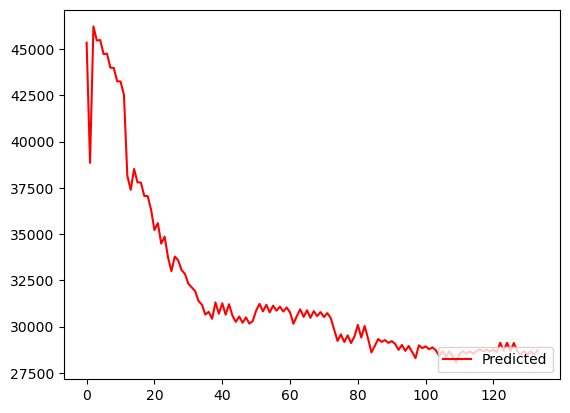

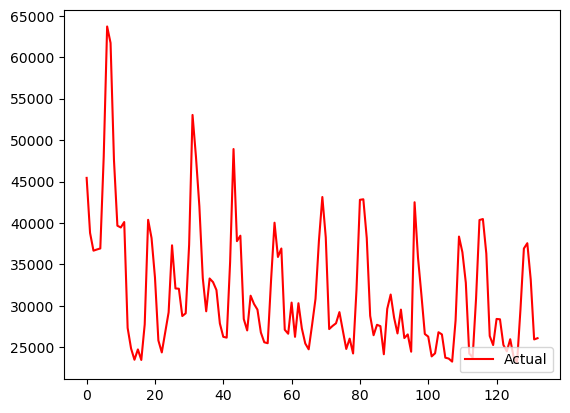

In [17]:
plot_graph(forecast_monthly['yhat'], 'Predicted')
plot_graph(monthly_consumption['y'],'Actual')


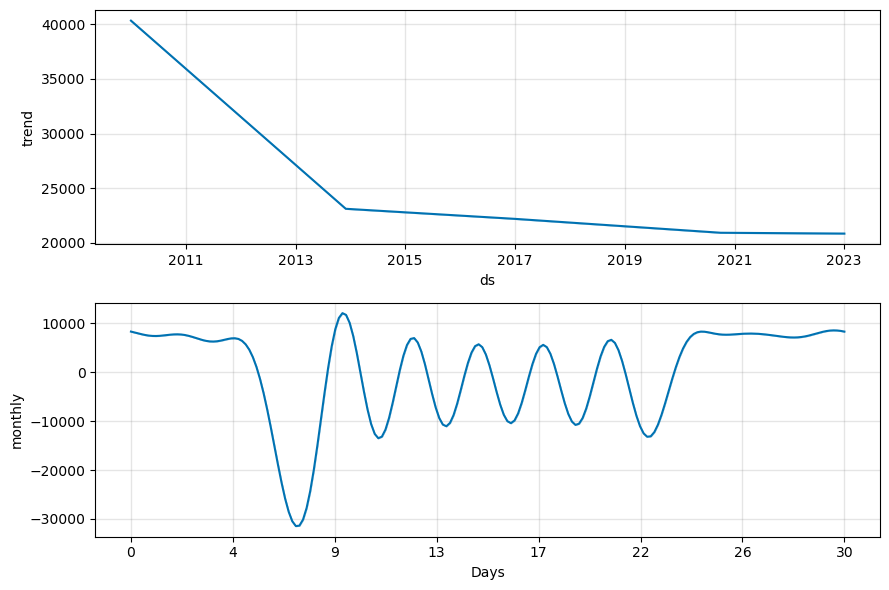

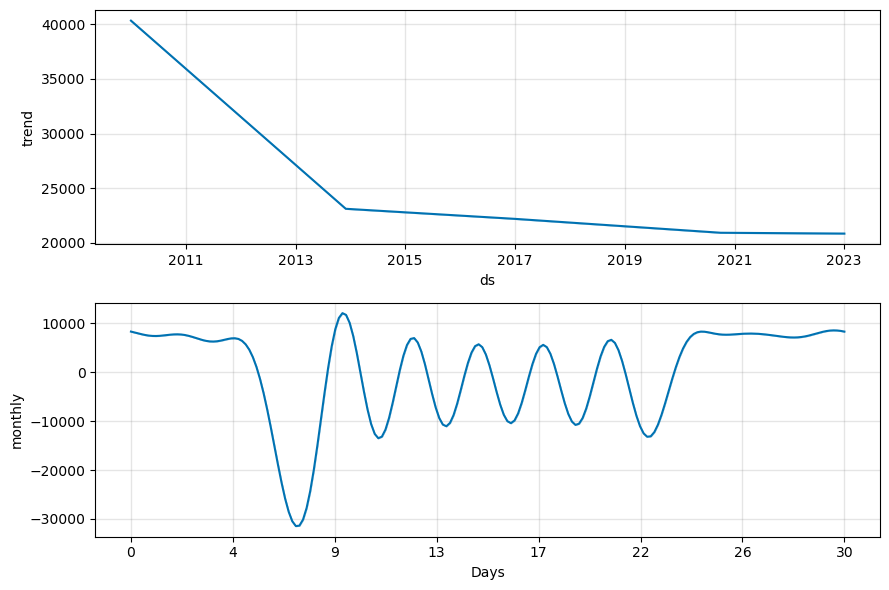

In [18]:
model_monthly.plot_components(forecast_monthly)

mean absolute error:  5188.8606764877795
mean absolute percenatge error:  0.1602058023252097
regression score:  0.2020794719633694


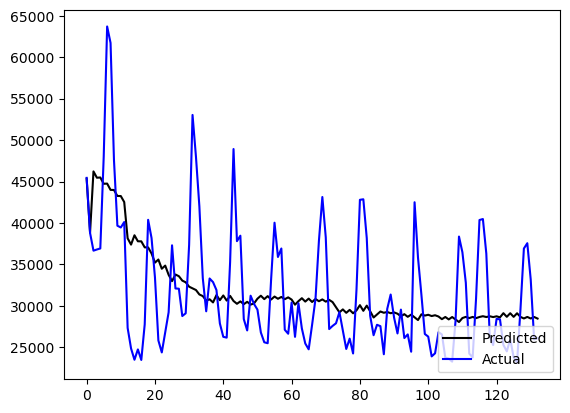

In [19]:
evaluate_forecast(forecast_monthly['yhat'], monthly_consumption['y'], 1)

In [20]:
model_monthly = train_model(growth='linear', seasonality='monthly', df=monthly_consumption)
future_monthly, forecast_monthly = get_forecast(model=model_monthly, time_period=6)
forecast_monthly.head()

20:24:46 - cmdstanpy - INFO - Chain [1] start processing
20:24:46 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,40325.132005,32611.450241,56570.865273,40325.132005,40325.132005,5023.619337,5023.619337,5023.619337,5023.619337,5023.619337,5023.619337,0.0,0.0,0.0,45348.751342
1,2010-02-01,39952.307336,27330.224557,51008.779408,39952.307336,39952.307336,-1097.875577,-1097.875577,-1097.875577,-1097.875577,-1097.875577,-1097.875577,0.0,0.0,0.0,38854.431758
2,2010-03-01,39615.562474,34141.968715,58217.582167,39615.562474,39615.562474,6611.133704,6611.133704,6611.133704,6611.133704,6611.133704,6611.133704,0.0,0.0,0.0,46226.696177
3,2010-04-01,39242.737805,33877.905678,57455.297802,39242.737805,39242.737805,6223.521147,6223.521147,6223.521147,6223.521147,6223.521147,6223.521147,0.0,0.0,0.0,45466.258952
4,2010-05-01,38881.939738,33242.849697,57144.927112,38881.939738,38881.939738,6611.133704,6611.133704,6611.133704,6611.133704,6611.133704,6611.133704,0.0,0.0,0.0,45493.073442


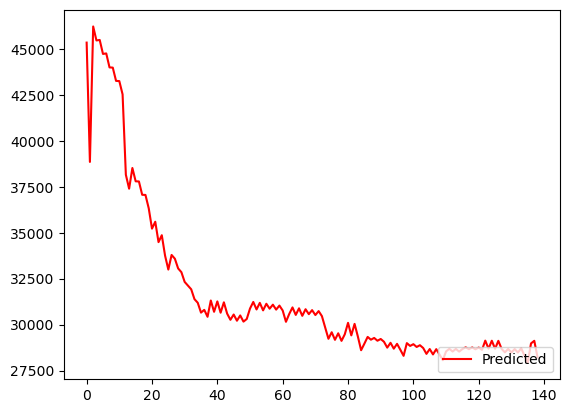

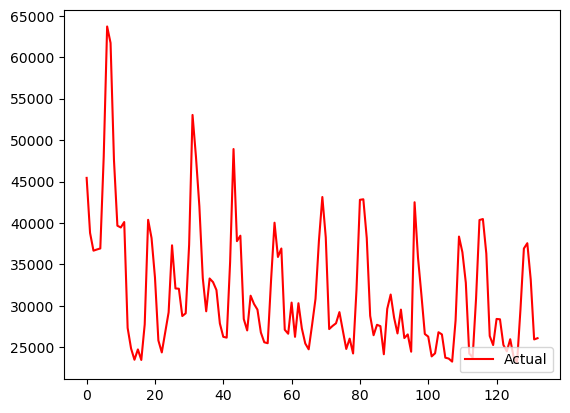

In [21]:
plot_graph(forecast_monthly['yhat'], 'Predicted')
plot_graph(monthly_consumption['y'],'Actual')

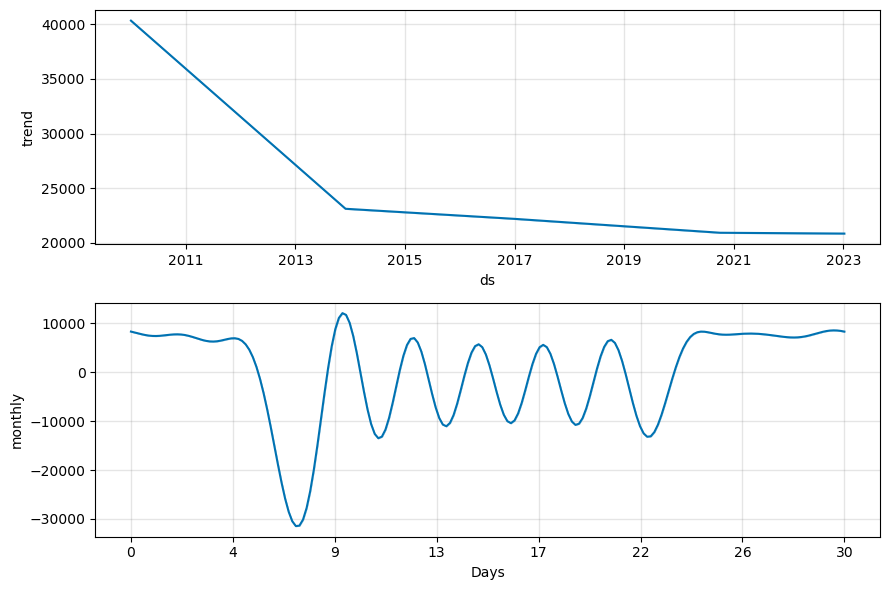

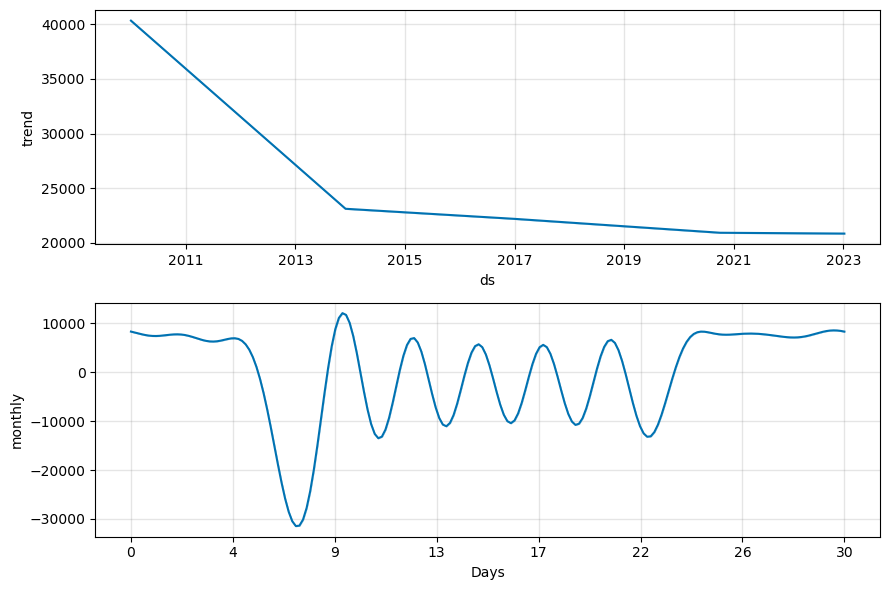

In [22]:
model_monthly.plot_components(forecast_monthly)


mean absolute error:  5188.8606764877795
mean absolute percenatge error:  0.1602058023252097
regression score:  0.2020794719633694


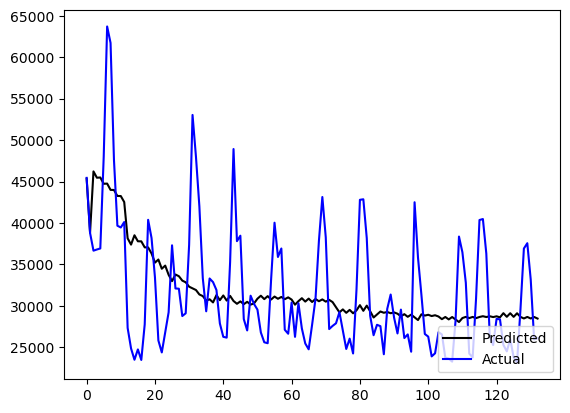

In [23]:
evaluate_forecast(forecast_monthly['yhat'], monthly_consumption['y'], 6)

In [24]:
model_monthly = train_model(growth='linear', seasonality='monthly', df=monthly_consumption)
future_monthly, forecast_monthly = get_forecast(model=model_monthly, time_period=9)
forecast_monthly.head()

20:24:48 - cmdstanpy - INFO - Chain [1] start processing
20:24:48 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,40325.132005,33407.154639,57220.341386,40325.132005,40325.132005,5023.619337,5023.619337,5023.619337,5023.619337,5023.619337,5023.619337,0.0,0.0,0.0,45348.751342
1,2010-02-01,39952.307336,27522.086921,51227.338010,39952.307336,39952.307336,-1097.875577,-1097.875577,-1097.875577,-1097.875577,-1097.875577,-1097.875577,0.0,0.0,0.0,38854.431758
2,2010-03-01,39615.562474,34050.040966,57508.243905,39615.562474,39615.562474,6611.133704,6611.133704,6611.133704,6611.133704,6611.133704,6611.133704,0.0,0.0,0.0,46226.696177
3,2010-04-01,39242.737805,33250.531884,58069.584877,39242.737805,39242.737805,6223.521147,6223.521147,6223.521147,6223.521147,6223.521147,6223.521147,0.0,0.0,0.0,45466.258952
4,2010-05-01,38881.939738,34011.839173,57027.993963,38881.939738,38881.939738,6611.133704,6611.133704,6611.133704,6611.133704,6611.133704,6611.133704,0.0,0.0,0.0,45493.073442


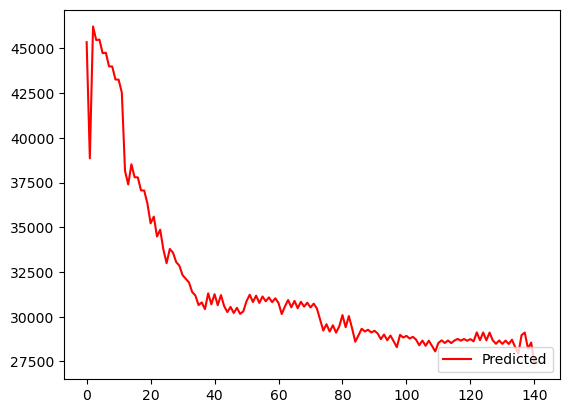

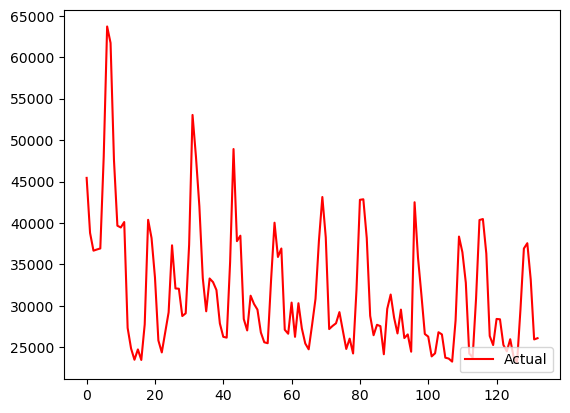

In [25]:
plot_graph(forecast_monthly['yhat'], 'Predicted')
plot_graph(monthly_consumption['y'],'Actual')

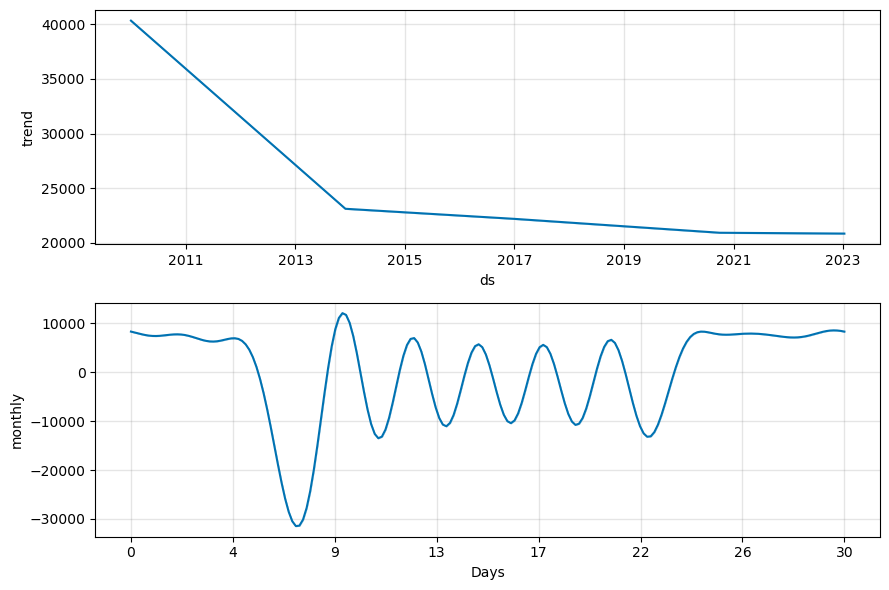

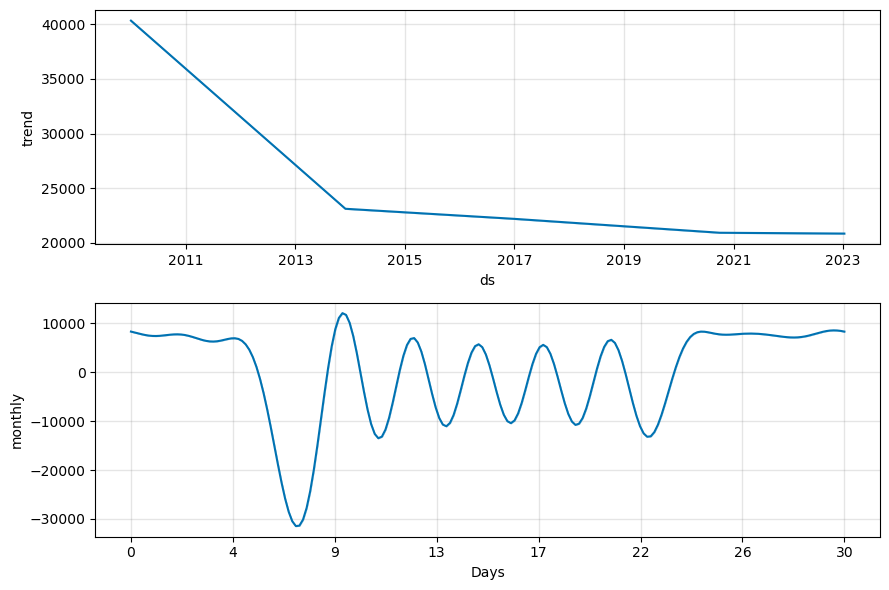

In [26]:
model_monthly.plot_components(forecast_monthly)


mean absolute error:  5188.8606764877795
mean absolute percenatge error:  0.1602058023252097
regression score:  0.2020794719633694


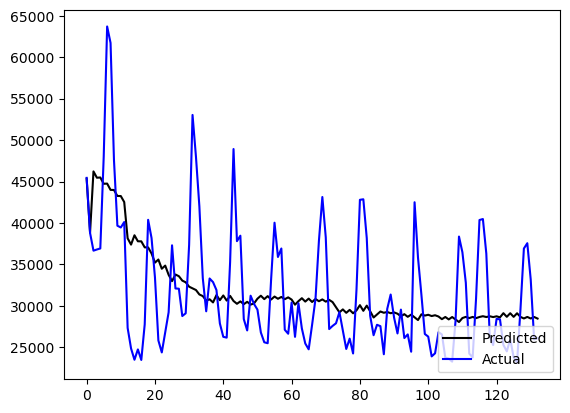

In [27]:
evaluate_forecast(forecast_monthly['yhat'], monthly_consumption['y'], 9)

In [28]:
# YEARLY

In [29]:
df_annual = pd.DataFrame(annual_consumption)
model_annual = train_model(growth='linear', seasonality='annual', df=annual_consumption)
future_annual, forecast_annual = get_forecast(model=model_annual, time_period=1)
forecast_annual.head()

20:24:50 - cmdstanpy - INFO - Chain [1] start processing
20:24:50 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,annual,annual_lower,annual_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,-861.393958,40738.790123,45045.006527,-861.393958,-861.393958,43726.388493,43726.388493,43726.388493,43726.388493,43726.388493,43726.388493,0.0,0.0,0.0,42864.994535
1,2012-01-01,-6259.828143,35733.738050,39892.966251,-6259.828143,-6259.828143,44038.165838,44038.165838,44038.165838,44038.165838,44038.165838,44038.165838,0.0,0.0,0.0,37778.337695
2,2013-01-01,-8966.440351,31929.077415,36130.474222,-8966.440351,-8966.440351,43058.011973,43058.011973,43058.011973,43058.011973,43058.011973,43058.011973,0.0,0.0,0.0,34091.571622
3,2014-01-01,-11665.657443,30060.174445,34269.701844,-11665.657443,-11665.657443,43726.388493,43726.388493,43726.388493,43726.388493,43726.388493,43726.388493,0.0,0.0,0.0,32060.731051
4,2015-01-01,-14364.874535,27333.339706,31923.268115,-14364.874535,-14364.874535,44053.888252,44053.888252,44053.888252,44053.888252,44053.888252,44053.888252,0.0,0.0,0.0,29689.013717


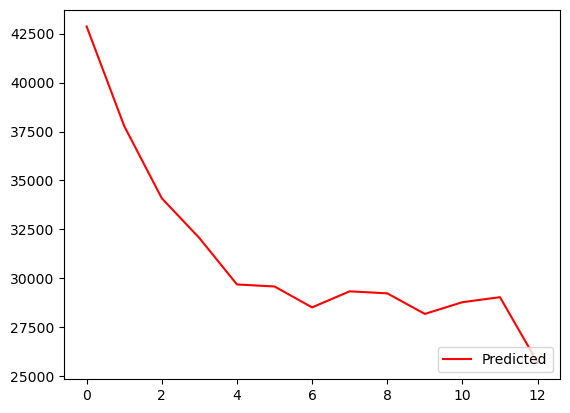

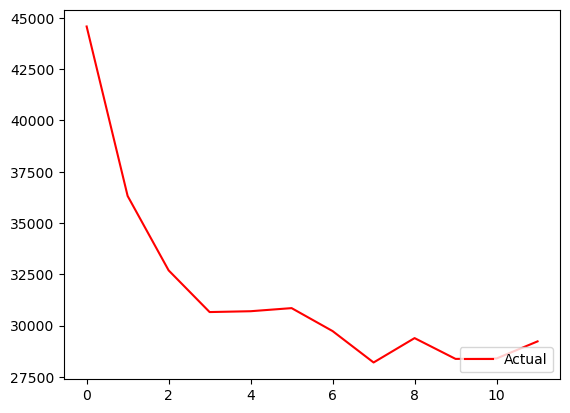

In [30]:
plot_graph(forecast_annual['yhat'], 'Predicted')
plot_graph(annual_consumption['y'], 'Actual')


mean absolute error:  961.1084065113388
mean absolute percenatge error:  0.02955021943929281
regression score:  0.9391139153445974


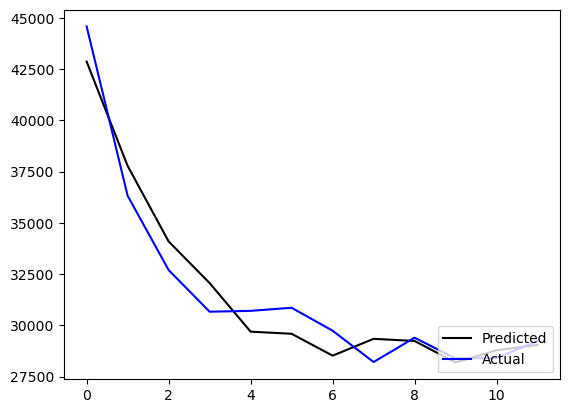

In [31]:
evaluate_forecast(forecast_annual['yhat'], annual_consumption['y'], 1)

In [32]:
df_annual = pd.DataFrame(annual_consumption)
model_annual = train_model(growth='linear', seasonality='annual', df=annual_consumption)
future_annual, forecast_annual = get_forecast(model=model_annual, time_period=10)
forecast_annual.head()


20:24:52 - cmdstanpy - INFO - Chain [1] start processing
20:24:52 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,annual,annual_lower,annual_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,-861.393958,40578.663042,45219.118562,-861.393958,-861.393958,43726.388493,43726.388493,43726.388493,43726.388493,43726.388493,43726.388493,0.0,0.0,0.0,42864.994535
1,2012-01-01,-6259.828143,35528.613988,39945.491611,-6259.828143,-6259.828143,44038.165838,44038.165838,44038.165838,44038.165838,44038.165838,44038.165838,0.0,0.0,0.0,37778.337695
2,2013-01-01,-8966.440351,31831.282288,36253.352845,-8966.440351,-8966.440351,43058.011973,43058.011973,43058.011973,43058.011973,43058.011973,43058.011973,0.0,0.0,0.0,34091.571622
3,2014-01-01,-11665.657443,29950.511451,34438.860467,-11665.657443,-11665.657443,43726.388493,43726.388493,43726.388493,43726.388493,43726.388493,43726.388493,0.0,0.0,0.0,32060.731051
4,2015-01-01,-14364.874535,27590.766285,31869.462017,-14364.874535,-14364.874535,44053.888252,44053.888252,44053.888252,44053.888252,44053.888252,44053.888252,0.0,0.0,0.0,29689.013717


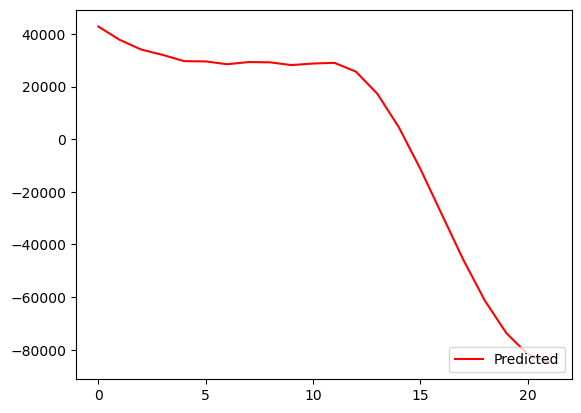

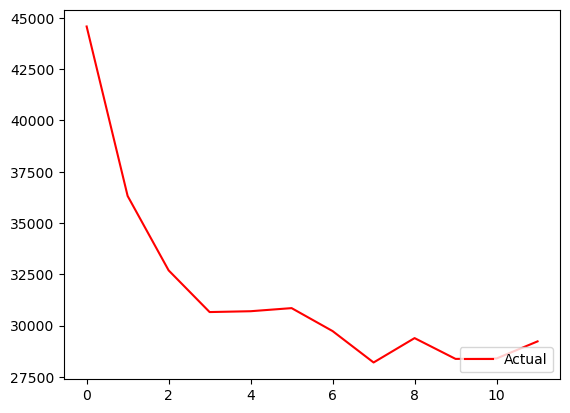

In [33]:
plot_graph(forecast_annual['yhat'], 'Predicted')
plot_graph(annual_consumption['y'], 'Actual')

mean absolute error:  961.1084065113388
mean absolute percenatge error:  0.02955021943929281
regression score:  0.9391139153445974


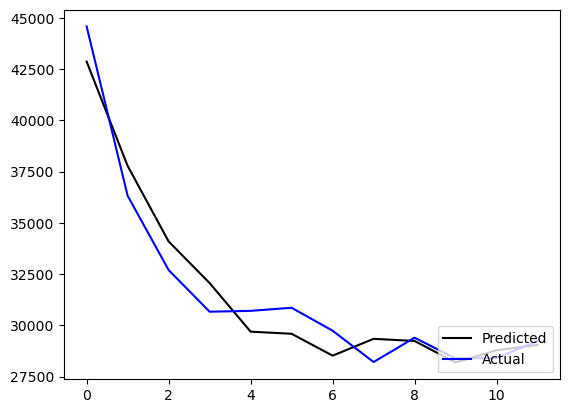

In [34]:
evaluate_forecast(forecast_annual['yhat'], annual_consumption['y'], 10)

In [35]:
df_annual = pd.DataFrame(annual_consumption)
model_annual = train_model(growth='linear', seasonality='annual', df=annual_consumption)
future_annual, forecast_annual = get_forecast(model=model_annual, time_period=20)
forecast_annual.head()

20:24:53 - cmdstanpy - INFO - Chain [1] start processing
20:24:53 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,annual,annual_lower,annual_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,-861.393958,40605.024014,44992.878220,-861.393958,-861.393958,43726.388493,43726.388493,43726.388493,43726.388493,43726.388493,43726.388493,0.0,0.0,0.0,42864.994535
1,2012-01-01,-6259.828143,35572.486225,39906.682492,-6259.828143,-6259.828143,44038.165838,44038.165838,44038.165838,44038.165838,44038.165838,44038.165838,0.0,0.0,0.0,37778.337695
2,2013-01-01,-8966.440351,31863.310938,36415.986467,-8966.440351,-8966.440351,43058.011973,43058.011973,43058.011973,43058.011973,43058.011973,43058.011973,0.0,0.0,0.0,34091.571622
3,2014-01-01,-11665.657443,29848.421644,34266.076494,-11665.657443,-11665.657443,43726.388493,43726.388493,43726.388493,43726.388493,43726.388493,43726.388493,0.0,0.0,0.0,32060.731051
4,2015-01-01,-14364.874535,27474.470594,31843.834450,-14364.874535,-14364.874535,44053.888252,44053.888252,44053.888252,44053.888252,44053.888252,44053.888252,0.0,0.0,0.0,29689.013717


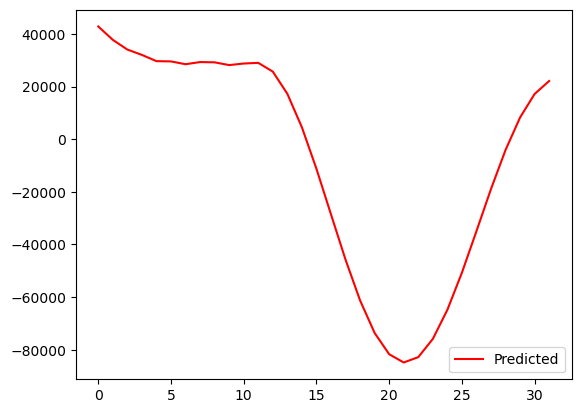

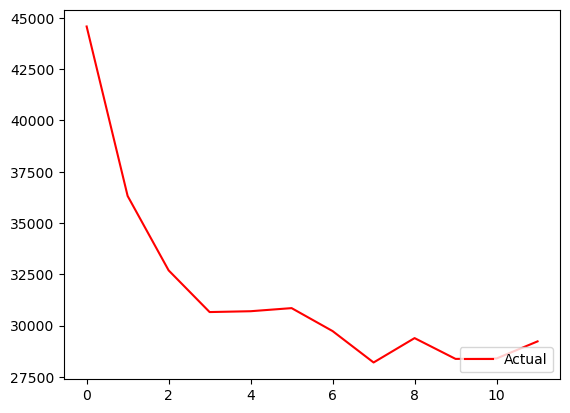

In [36]:
plot_graph(forecast_annual['yhat'], 'Predicted')
plot_graph(annual_consumption['y'], 'Actual')

mean absolute error:  961.1084065113388
mean absolute percenatge error:  0.02955021943929281
regression score:  0.9391139153445974


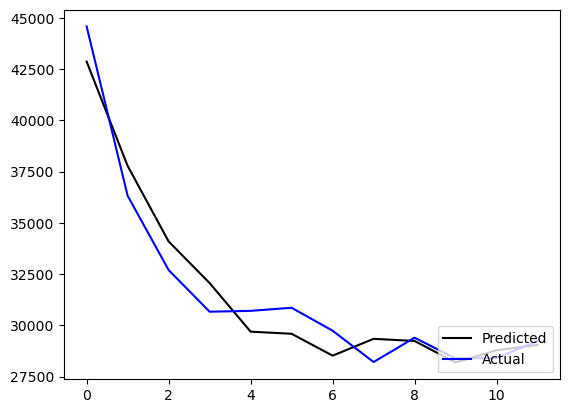

In [37]:
evaluate_forecast(forecast_annual['yhat'], annual_consumption['y'], 20)

In [38]:
# daily 

In [39]:
df_daily = pd.DataFrame(daily_consumption)
df_daily.dtypes
model_daily = train_model(growth='linear', seasonality='daily', df=df_daily)
future_daily, forecast_daily = get_forecast(model=model_daily, time_period=100)
forecast_daily.head()

20:24:55 - cmdstanpy - INFO - Chain [1] start processing
20:24:55 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,1515.333796,1130.405639,1943.730135,1515.333796,1515.333796,16.880192,16.880192,16.880192,16.880192,16.880192,16.880192,0.0,0.0,0.0,1532.213987
1,2010-01-02,1514.987908,1158.979804,1915.858498,1514.987908,1514.987908,16.880192,16.880192,16.880192,16.880192,16.880192,16.880192,0.0,0.0,0.0,1531.868099
2,2010-01-03,1514.642020,1132.963969,1954.078237,1514.642020,1514.642020,16.880192,16.880192,16.880192,16.880192,16.880192,16.880192,0.0,0.0,0.0,1531.522212
3,2010-01-04,1514.296132,1148.088267,1927.579207,1514.296132,1514.296132,16.880192,16.880192,16.880192,16.880192,16.880192,16.880192,0.0,0.0,0.0,1531.176324
4,2010-01-05,1513.950244,1100.927942,1925.704361,1513.950244,1513.950244,16.880192,16.880192,16.880192,16.880192,16.880192,16.880192,0.0,0.0,0.0,1530.830436


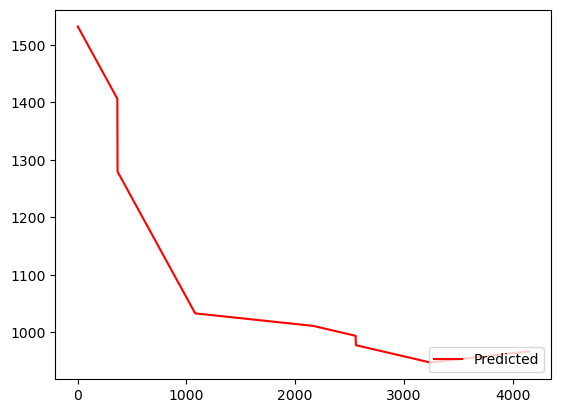

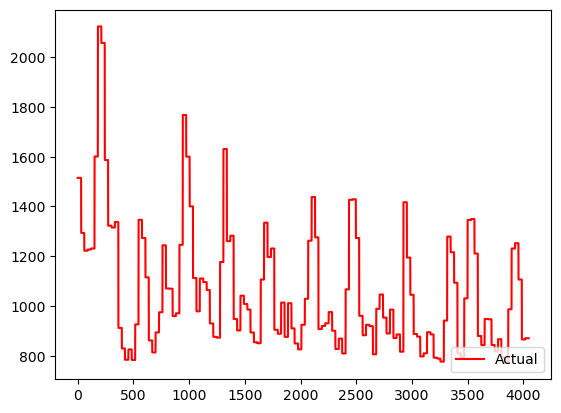

In [40]:
plot_graph(forecast_daily['yhat'], 'Predicted')
plot_graph(daily_consumption['y'], 'Actual')

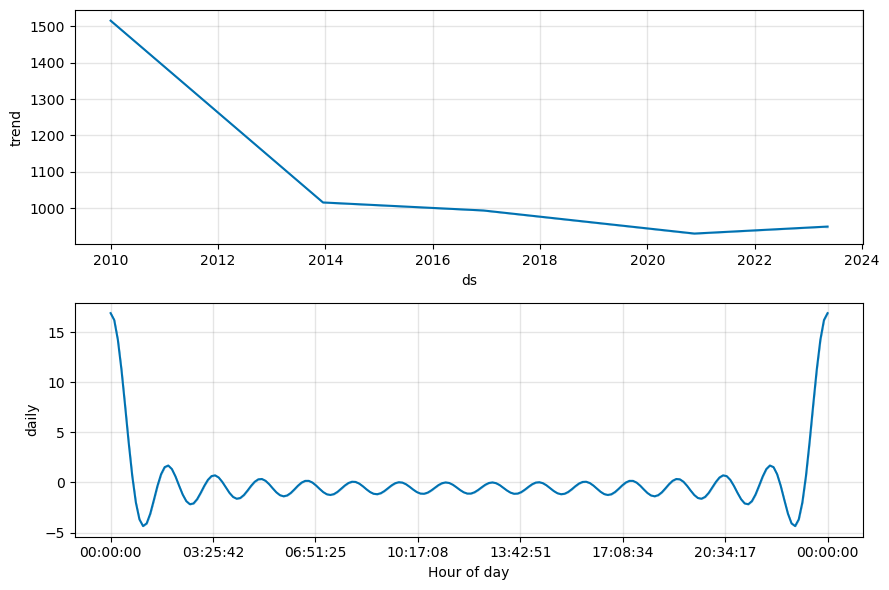

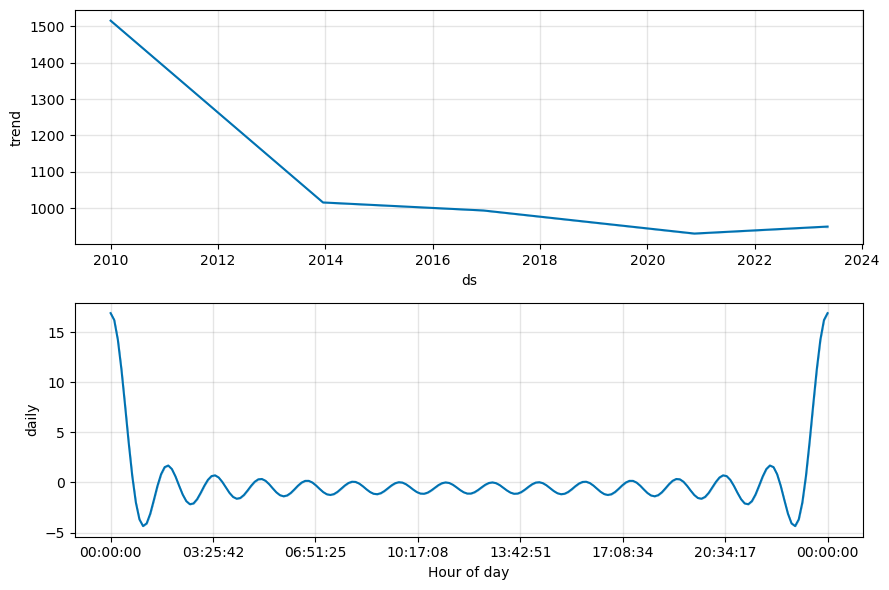

In [41]:
model_daily.plot_components(forecast_daily)

mean absolute error:  174.80885396033275
mean absolute percenatge error:  0.16120838851499453
regression score:  0.2056527823074602


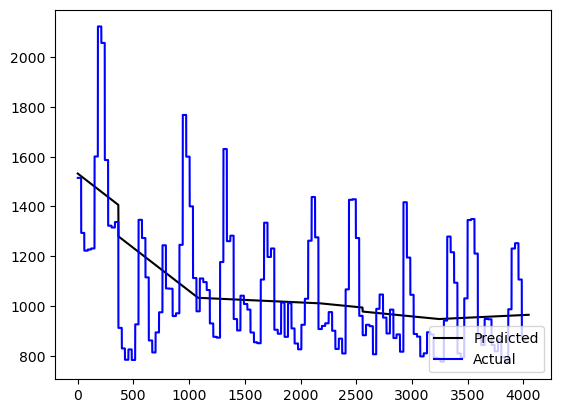

In [42]:
evaluate_forecast(forecast_daily['yhat'],df_daily['y'], 100)


In [43]:
df_daily = pd.DataFrame(daily_consumption)
df_daily.dtypes
model_daily = train_model(growth='linear', seasonality='daily', df=df_daily)
future_daily, forecast_daily = get_forecast(model=model_daily, time_period=200)
forecast_daily.head()

20:25:00 - cmdstanpy - INFO - Chain [1] start processing
20:25:00 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,1515.333796,1105.511320,1946.821131,1515.333796,1515.333796,16.880192,16.880192,16.880192,16.880192,16.880192,16.880192,0.0,0.0,0.0,1532.213987
1,2010-01-02,1514.987908,1138.849719,1949.975470,1514.987908,1514.987908,16.880192,16.880192,16.880192,16.880192,16.880192,16.880192,0.0,0.0,0.0,1531.868099
2,2010-01-03,1514.642020,1113.626003,1935.645245,1514.642020,1514.642020,16.880192,16.880192,16.880192,16.880192,16.880192,16.880192,0.0,0.0,0.0,1531.522212
3,2010-01-04,1514.296132,1109.912934,1937.564918,1514.296132,1514.296132,16.880192,16.880192,16.880192,16.880192,16.880192,16.880192,0.0,0.0,0.0,1531.176324
4,2010-01-05,1513.950244,1141.226894,1935.426414,1513.950244,1513.950244,16.880192,16.880192,16.880192,16.880192,16.880192,16.880192,0.0,0.0,0.0,1530.830436


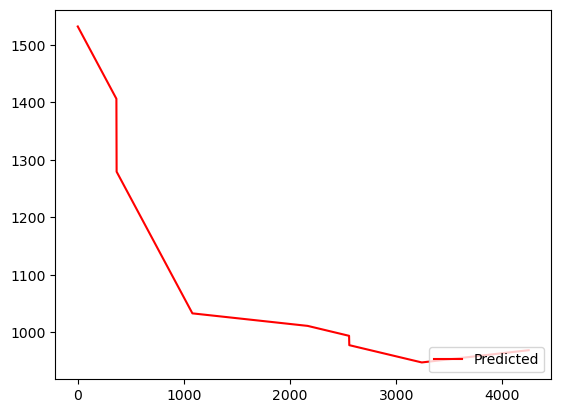

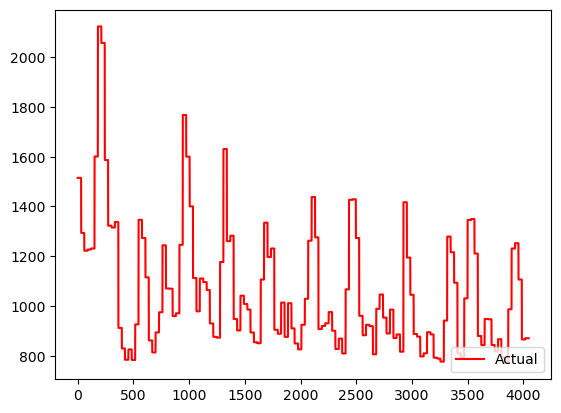

In [44]:
plot_graph(forecast_daily['yhat'], 'Predicted')
plot_graph(daily_consumption['y'], 'Actual')

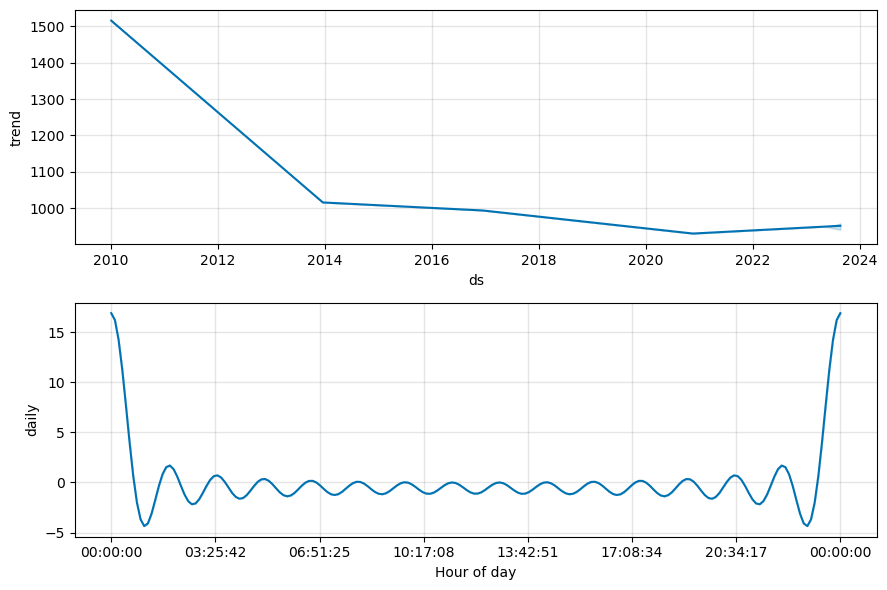

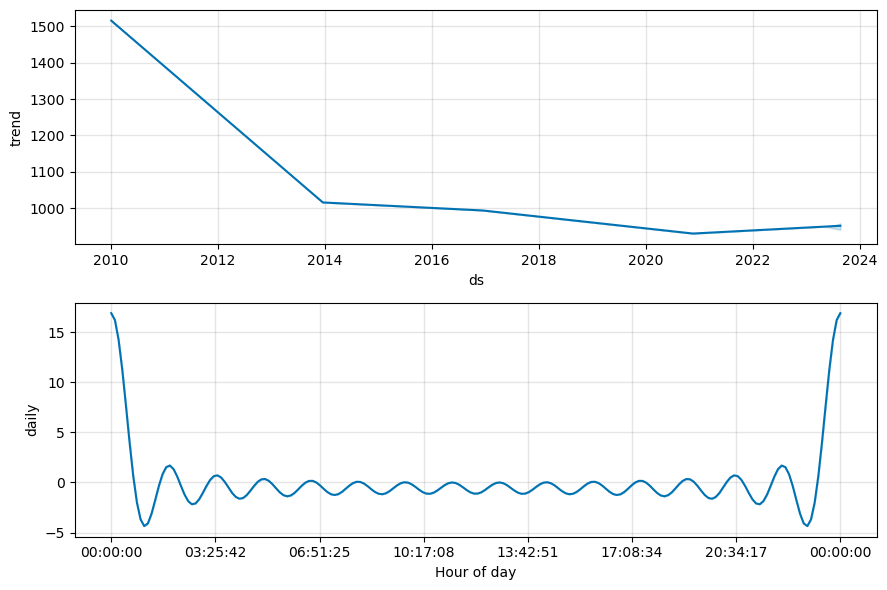

In [45]:
model_daily.plot_components(forecast_daily)

mean absolute error:  174.80885396033275
mean absolute percenatge error:  0.16120838851499453
regression score:  0.2056527823074602


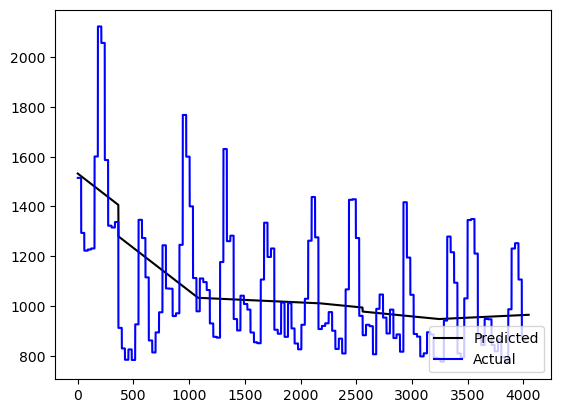

In [46]:
evaluate_forecast(forecast_daily['yhat'],df_daily['y'], 200)

In [47]:
df_daily = pd.DataFrame(daily_consumption)
df_daily.dtypes
model_daily = train_model(growth='linear', seasonality='daily', df=df_daily)
future_daily, forecast_daily = get_forecast(model=model_daily, time_period=365)
forecast_daily.head()

20:25:04 - cmdstanpy - INFO - Chain [1] start processing
20:25:04 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,1515.333796,1147.314730,1941.259248,1515.333796,1515.333796,16.880192,16.880192,16.880192,16.880192,16.880192,16.880192,0.0,0.0,0.0,1532.213987
1,2010-01-02,1514.987908,1101.961861,1908.957597,1514.987908,1514.987908,16.880192,16.880192,16.880192,16.880192,16.880192,16.880192,0.0,0.0,0.0,1531.868099
2,2010-01-03,1514.642020,1116.507221,1896.786385,1514.642020,1514.642020,16.880192,16.880192,16.880192,16.880192,16.880192,16.880192,0.0,0.0,0.0,1531.522212
3,2010-01-04,1514.296132,1143.475808,1961.383141,1514.296132,1514.296132,16.880192,16.880192,16.880192,16.880192,16.880192,16.880192,0.0,0.0,0.0,1531.176324
4,2010-01-05,1513.950244,1131.090201,1963.617464,1513.950244,1513.950244,16.880192,16.880192,16.880192,16.880192,16.880192,16.880192,0.0,0.0,0.0,1530.830436


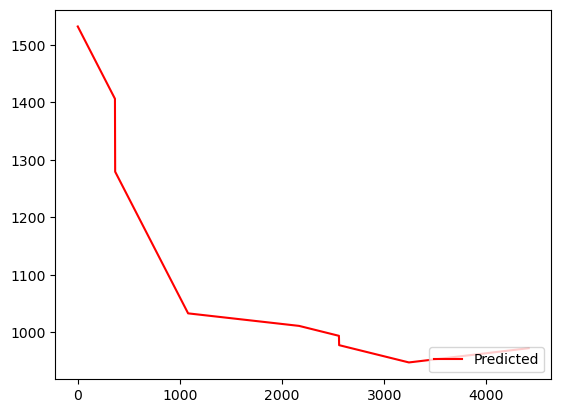

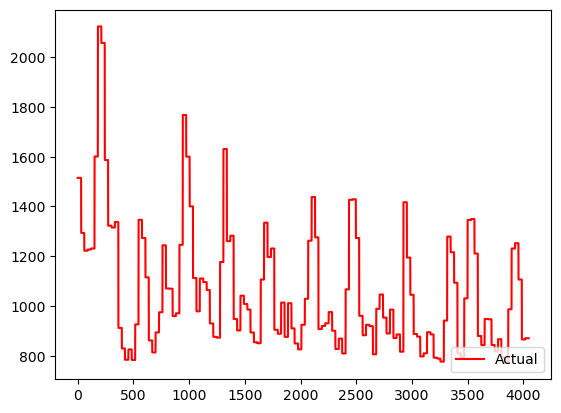

In [48]:
plot_graph(forecast_daily['yhat'], 'Predicted')
plot_graph(daily_consumption['y'], 'Actual')

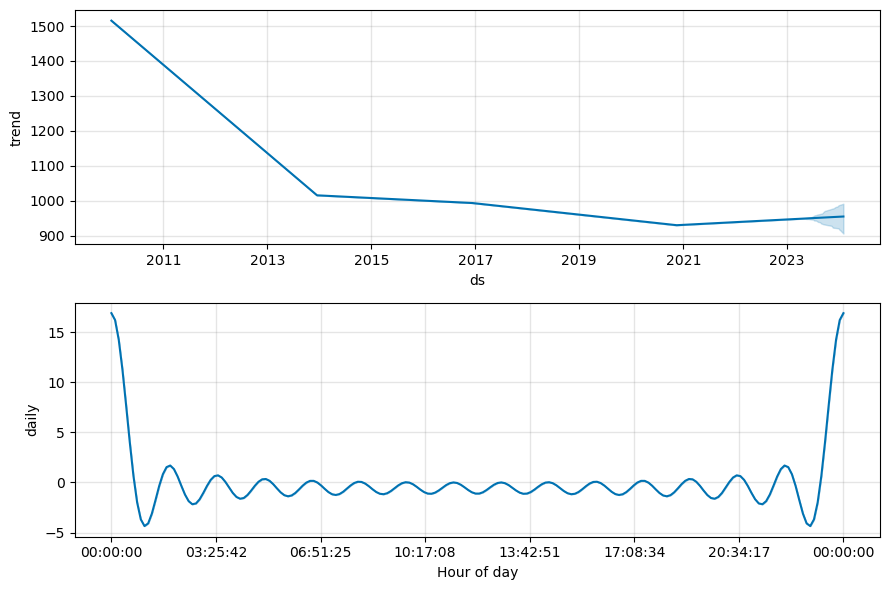

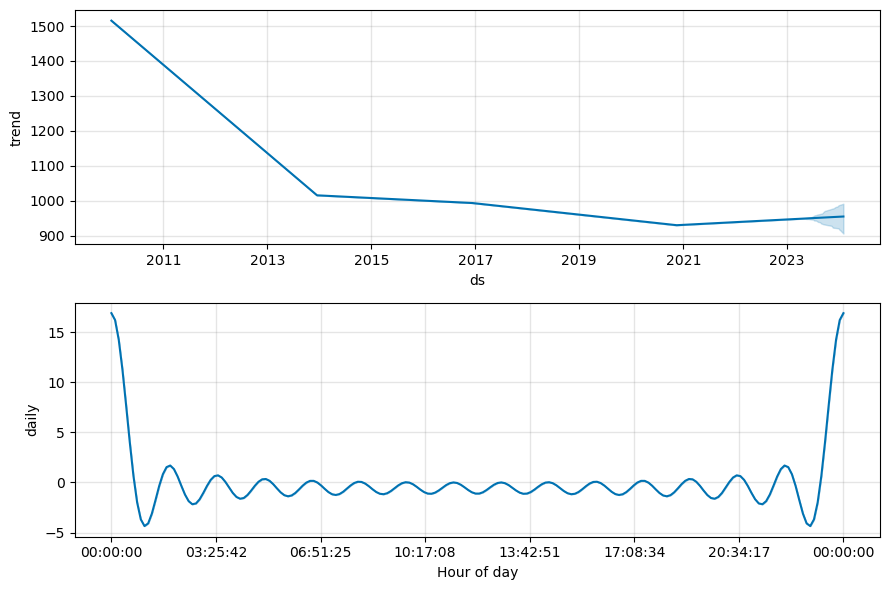

In [49]:
model_daily.plot_components(forecast_daily)

mean absolute error:  174.80885396033275
mean absolute percenatge error:  0.16120838851499453
regression score:  0.2056527823074602


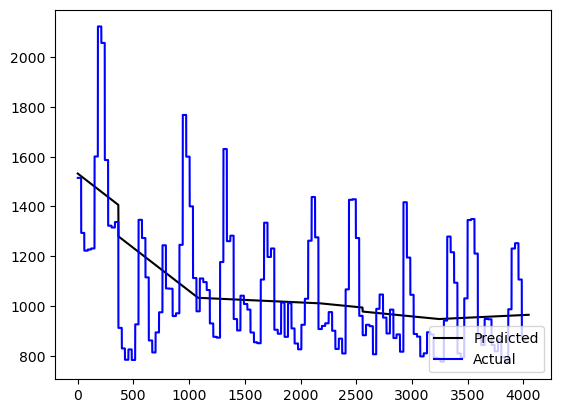

In [50]:
evaluate_forecast(forecast_daily['yhat'],df_daily['y'], 365)

In [51]:
df_b = pd.read_csv('Electric_Consumption_And_Cost.csv',low_memory=False)

In [52]:
df_b['Borough'].unique()

array(['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND',
       'NON DEVELOPMENT FACILITY', 'FHA'], dtype=object)

In [53]:
boroughs = ['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND', 'NON DEVELOPMENT FACILITY', 'FHA']
for borough in boroughs:
  borough_df = df_b[df_b['Borough']== borough]
  print("\n")
  print('\033[1m'+ "Electrical Consumption prediction for: " + borough + '\033[0m')
  print(borough_df.head())
  print("\n")
  print('\033[1m' + "Size of "+ borough + "Datafram is: "+ '\033[0m'+ str(borough_df.size))
  borough_df['Revenue Month']= pd.to_datetime(borough_df['Revenue Month'], dayfirst=True)
  borough_monthly_mean_consumption = calculate_monthly_mean_consumption(borough_df)
  borough_monthly_df = pd.DataFrame(borough_monthly_mean_consumption, columns=['ds','y'])
  borough_daily_df = calculate_daily_consumption(borough_monthly_df)
  borough_yearly_df = borough_monthly_df.groupby(pd.PeriodIndex(borough_monthly_df['ds'], freq='Y'))['y'].to_timestamp().reset_index()

  # daily forecast
  print("\n")
  print('\o33[1m'+ "Daily Forecast for" + borough + '\033[0m')
  print("\n")
  model_daily



Electrical Consumption prediction for: BRONX
  Development Name Borough Account Name Location Meter AMR   Meter Scope  \
0            ADAMS   BRONX        ADAMS   BLD 05      NONE  BLD 01 to 07   
1            ADAMS   BRONX        ADAMS   BLD 05      NONE  BLD 01 to 07   
2            ADAMS   BRONX        ADAMS   BLD 05      NONE  BLD 01 to 07   
3            ADAMS   BRONX        ADAMS   BLD 05      NONE  BLD 01 to 07   
4            ADAMS   BRONX        ADAMS   BLD 05      NONE  BLD 01 to 07   

   TDS #  EDP  RC Code Funding Source  ... Meter Number Estimated  \
0  118.0  248  B011800        FEDERAL  ...      7223256         N   
1  118.0  248  B011800        FEDERAL  ...      7223256         N   
2  118.0  248  B011800        FEDERAL  ...      7223256         N   
3  118.0  248  B011800        FEDERAL  ...      7223256         N   
4  118.0  248  B011800        FEDERAL  ...      7223256         N   

   Current Charges   Rate Class Bill Analyzed Consumption (KWH)  KWH Charges  \
0



Electrical Consumption prediction for: NON DEVELOPMENT FACILITY
                            Development Name                   Borough  \
16057  NDF - BRONX OFFICE, 1200 WATERS PLACE  NON DEVELOPMENT FACILITY   
16058  NDF - BRONX OFFICE, 1200 WATERS PLACE  NON DEVELOPMENT FACILITY   
16059  NDF - BRONX OFFICE, 1200 WATERS PLACE  NON DEVELOPMENT FACILITY   
16060  NDF - BRONX OFFICE, 1200 WATERS PLACE  NON DEVELOPMENT FACILITY   
16061  NDF - BRONX OFFICE, 1200 WATERS PLACE  NON DEVELOPMENT FACILITY   

                                Account Name Location Meter AMR Meter Scope  \
16057  NDF - BRONX OFFICE, 1200 WATERS PLACE   BLD 01      NONE         NaN   
16058  NDF - BRONX OFFICE, 1200 WATERS PLACE   BLD 01      NONE         NaN   
16059  NDF - BRONX OFFICE, 1200 WATERS PLACE   BLD 01      NONE         NaN   
16060  NDF - BRONX OFFICE, 1200 WATERS PLACE   BLD 01      NONE         NaN   
16061  NDF - BRONX OFFICE, 1200 WATERS PLACE   BLD 01      NONE         NaN   

       TDS #  